<a href="https://colab.research.google.com/github/imusicmash/learning-langgraph/blob/main/langraph_chatbot_w_anthropic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://langchain-ai.github.io/langgraph/tutorials/introduction/

%pip install -U langgraph langsmith langchain_anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [9]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
# set the LLM with langchain's llm implementation
# setup ability to get hidden key information from this colab
# and os object to store keys in the environment

from google.colab import userdata
import os

from langchain_anthropic import ChatAnthropic

anthropic_key = userdata.get('anthropic_zi2')

llm = ChatAnthropic(anthropic_api_key=anthropic_key, model="claude-3-5-sonnet-20241022")


In [10]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [11]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [12]:
graph = graph_builder.compile()

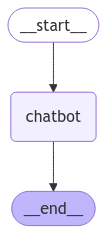

In [14]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: What is a decorator in python?
Assistant: A decorator in Python is a design pattern that allows you to modify the behavior of a function or class without directly changing its source code. It's a way to wrap one function with another function, adding functionality to the original function.

Here are the key points about decorators:

1. Basic Syntax:
```python
@decorator_function
def original_function():
    pass
```

This is equivalent to:
```python
original_function = decorator_function(original_function)
```

2. Simple Decorator Example:
```python
def my_decorator(func):
    def wrapper():
        print("Something happens before the function is called")
        func()
        print("Something happens after the function is called")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

# When we call say_hello()
say_hello()
# Output:
# Something happens before the function is called
# Hello!
# Something happens after the function is called
```

3. Decorator with